# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data?resource=download

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
#importing all the libraries necessary for EDA and data visualization later down the road
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("goodreads_data.csv")

In [2]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [4]:
#print the columns
df.columns

Index(['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')

In [5]:
#rename the 'Unnamed' column
df = df.rename(columns={'Unnamed: 0':'ID'})

In [6]:
df.columns

Index(['ID', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')

In [7]:
# check the size of df
df.shape

(10000, 8)

In [8]:
# check for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

Number of duplicated rows:  (0, 8)


In [9]:
# what's the avg rating of the data set?
df["Avg_Rating"].describe()

count    10000.000000
mean         4.068577
std          0.335359
min          0.000000
25%          3.880000
50%          4.080000
75%          4.260000
max          5.000000
Name: Avg_Rating, dtype: float64

In [10]:
#which book has the highest rating?
top_books = (df[df.Avg_Rating == df.Avg_Rating.max()])

In [11]:
# how many?
top_books.shape

(120, 8)

In [12]:
top_books.head()

,ID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
3737,3737,Joey Wheeler: The Official Character & Monster...,"Arthur ""Sam"" Murakami","""Check out this official character and monster...",[],5.0,2,https://www.goodreads.com/book/show/2114514.Jo...
4603,4603,"This Land of Streams: Spiritual, Friendship, R...",Maria Johnsen,You will find within this book Maria Johnsen's...,[],5.0,11,https://www.goodreads.com/book/show/20773953-t...
4824,4824,"Ama Dios (4 AoL Consciousness Books Combined, ...",Nataša Pantović,"Ama Dios, 4 AoL Consciousness Books Combined.A...","['Philosophy', 'Spirituality', 'Adult']",5.0,6,https://www.goodreads.com/book/show/44015366-a...
5809,5809,The Secrets of Albion Falls (The Secrets Serie...,Sass Cadeaux,Living a sequestered life in magical village n...,[],5.0,23,https://www.goodreads.com/book/show/17310646-t...
5843,5843,Eclavarda Rising,Stephen Christiansen,NaN,[],5.0,2,https://www.goodreads.com/book/show/23353186-e...


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [13]:
# get top 10 most common genres
genre_count = df['Genres'].value_counts().head(10)
genre_count

[]                                                                                            960
['Fiction']                                                                                    49
['Fantasy']                                                                                    42
['Nonfiction']                                                                                 24
['Romance']                                                                                    20
['Poetry']                                                                                     18
['Horror']                                                                                     15
['Thriller', 'Fiction', 'Mystery', 'Crime', 'Action', 'Suspense', 'Mystery Thriller']          11
['Fiction', 'Young Adult', 'Childrens', 'Middle Grade', 'Fantasy', 'Mystery', 'Adventure']     11
['Self Help']                                                                                   9
Name: Genres, dtype:

The above output reveals that there was missing a significant amount of missing data in the Genres column. I will address this in the next checkpoint when I clean the data.

# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. 

In [14]:
# run a sample to check for any data problems
df.sample(10)

,ID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
2229,2229,As a Man Thinketh,James Allen,The mind guides our footsteps as we progress a...,"['Self Help', 'Nonfiction', 'Philosophy', 'Per...",4.25,"77,010",https://www.goodreads.com/book/show/81959.As_a...
8999,8999,What If You Could Skip the Cancer?,Katrina Bos,Why do we get cancer? Is it all just carcinoge...,[],4.36,22,https://www.goodreads.com/book/show/7477618-wh...
9645,9645,Stop Saying Yes to Mr. No Good: Get Rid of Tox...,Karlicia Lewis,How many times have you asked yourself what yo...,[],4.44,9,https://www.goodreads.com/book/show/18250305-s...
3881,3881,Passionate Declarations: Essays on War and Jus...,Howard Zinn,“A shotgun blast of revisionism that aims to s...,"['History', 'Politics', 'Nonfiction', 'Philoso...",4.35,363,https://www.goodreads.com/book/show/16197.Pass...
3776,3776,"Selling Scarlett (Love Inc., #1)",Ella James,Elizabeth DeVille doesn't belong at a party li...,"['Romance', 'New Adult', 'Erotica', 'Contempor...",3.72,"7,157",https://www.goodreads.com/book/show/17379508-s...
9707,9707,Happiness Lost,R.L. Wallace,Disenchanted author Harry Sinclaire is complet...,[],4.22,9,https://www.goodreads.com/book/show/18586360-h...
2452,2452,Homo Faber,Max Frisch,Walter Faber is an emotionally detached engine...,"['Classics', 'Fiction', 'German Literature', '...",3.71,"23,995",https://www.goodreads.com/book/show/10009.Homo...
2810,2810,"Undone (Will Trent, #3)",Karin Slaughter,When a tortured young woman enters the trauma ...,"['Thriller', 'Mystery', 'Crime', 'Fiction', 'S...",4.22,"55,237",https://www.goodreads.com/book/show/5764902-un...
1819,1819,The Legendary Wolf,Ammar Habib,"Available in paperback, Kindle, and Kindle Unl...","['Thriller', 'Action', 'Westerns', 'Military F...",4.28,"5,196",https://www.goodreads.com/book/show/45456188-t...
2039,2039,Rising Strong: The Reckoning. The Rumble. The ...,Brené Brown,Social scientist Brené Brown has ignited a glo...,"['Nonfiction', 'Self Help', 'Psychology', 'Per...",4.25,"77,214",https://www.goodreads.com/book/show/23317538-r...


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [15]:
# know that the Genre column needs some cleaning:
genre_count = df['Genres'].value_counts().head(10)
genre_count

[]                                                                                            960
['Fiction']                                                                                    49
['Fantasy']                                                                                    42
['Nonfiction']                                                                                 24
['Romance']                                                                                    20
['Poetry']                                                                                     18
['Horror']                                                                                     15
['Thriller', 'Fiction', 'Mystery', 'Crime', 'Action', 'Suspense', 'Mystery Thriller']          11
['Fiction', 'Young Adult', 'Childrens', 'Middle Grade', 'Fantasy', 'Mystery', 'Adventure']     11
['Self Help']                                                                                   9
Name: Genres, dtype:

In [16]:
# replace null value '[]' with NaN
df['Genres']=df["Genres"].replace('[]',np.NaN)

In [17]:
# see if that worked
genre_count = df['Genres'].value_counts().head(10)
genre_count

['Fiction']                                                                                   49
['Fantasy']                                                                                   42
['Nonfiction']                                                                                24
['Romance']                                                                                   20
['Poetry']                                                                                    18
['Horror']                                                                                    15
['Thriller', 'Fiction', 'Mystery', 'Crime', 'Action', 'Suspense', 'Mystery Thriller']         11
['Fiction', 'Young Adult', 'Childrens', 'Middle Grade', 'Fantasy', 'Mystery', 'Adventure']    11
['Self Help']                                                                                  9
['Young Adult']                                                                                9
Name: Genres, dtype: int64

<Axes: >

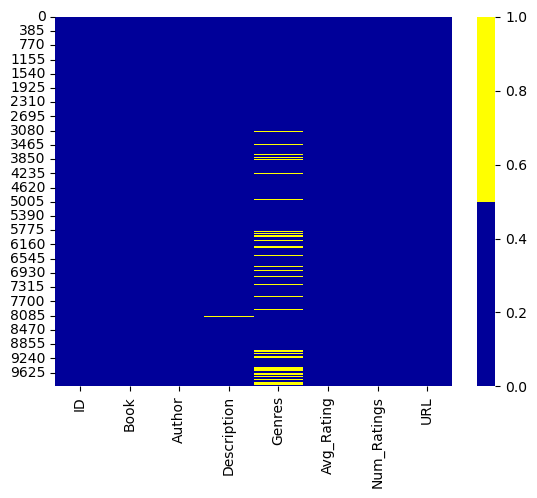

In [18]:
# Plot a heatmap of any missing data
cols = df.columns[:30] # first 30 columns
colors = ['#000099', '#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [19]:
# Try out a missing data percentage list! 
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Book - 0%
Author - 0%
Description - 1%
Genres - 10%
Avg_Rating - 0%
Num_Ratings - 0%
URL - 0%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<Axes: >

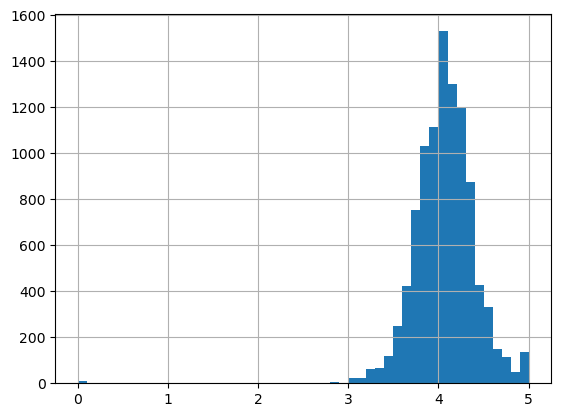

In [20]:
# Plot a histogram to see if there are any outliers.
df["Avg_Rating"].hist(bins=50)

In [21]:
# Use the describe() method
df["Avg_Rating"].describe()

count    10000.000000
mean         4.068577
std          0.335359
min          0.000000
25%          3.880000
50%          4.080000
75%          4.260000
max          5.000000
Name: Avg_Rating, dtype: float64

This means there is a book with a 0 score on average rating, which appears to be an outlier. 

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [22]:
# check for duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

Number of duplicated rows:  (0, 8)


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [23]:
df['Genres'].sample(10)

8280    ['Picture Books', 'Childrens', 'Fiction', 'Cla...
4928    ['Young Adult', 'Fiction', 'Realistic Fiction'...
1635    ['Fiction', 'Thriller', 'Mystery Thriller', 'C...
7934    ['Fantasy', 'Fiction', 'Science Fiction Fantas...
3617    ['Memoir', 'Nonfiction', 'Biography', 'Humor',...
5911                 ['Fantasy', 'Retellings', 'Fiction']
5312    ['Fiction', 'Africa', 'Historical Fiction', 'Z...
1894    ['Humor', 'Nonfiction', 'Essays', 'Memoir', 'A...
7936    ['Westerns', 'Fiction', 'Historical Fiction', ...
738     ['Fantasy', 'Fiction', 'High Fantasy', 'Epic F...
Name: Genres, dtype: object

In [24]:
# make a new dataframe for data manipulation with ID, genres, avg rating, num of ratings
df1 = df[['ID','Genres','Avg_Rating','Num_Ratings']].copy()
df1.head()

,ID,Genres,Avg_Rating,Num_Ratings
0,0,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311"
1,1,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135"
2,2,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155"
3,3,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438"
4,4,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172"


In [25]:
df1['Genres'] = df1['Genres'].str.split(',')

In [26]:
df1 = df1.explode('Genres')
df1

,ID,Genres,Avg_Rating,Num_Ratings
0,0,['Classics',4.27,"5,691,311"
0,0,'Fiction',4.27,"5,691,311"
0,0,'Historical Fiction',4.27,"5,691,311"
0,0,'School',4.27,"5,691,311"
0,0,'Literature',4.27,"5,691,311"
...,...,...,...,...
9998,9998,['New Adult',4.13,263
9998,9998,'Romance',4.13,263
9998,9998,'Contemporary Romance',4.13,263
9998,9998,'Contemporary'],4.13,263


In [27]:
# clean the column to remove unnecessary punctuation
df1['Genres']=df1['Genres'].str.replace('[','')
df1['Genres']=df1['Genres'].str.replace(']','')
df1['Genres']=df1['Genres'].str.replace("'",'')
df1['Genres']=df1['Genres'].str.replace("'",'')
df1['Genres']=df1['Genres'].str.strip()
# check to make sure that worked
df1

C:\Users\johan\AppData\Local\Temp\ipykernel_5532\2532118343.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Genres']=df1['Genres'].str.replace('[','')
C:\Users\johan\AppData\Local\Temp\ipykernel_5532\2532118343.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Genres']=df1['Genres'].str.replace(']','')


,ID,Genres,Avg_Rating,Num_Ratings
0,0,Classics,4.27,"5,691,311"
0,0,Fiction,4.27,"5,691,311"
0,0,Historical Fiction,4.27,"5,691,311"
0,0,School,4.27,"5,691,311"
0,0,Literature,4.27,"5,691,311"
...,...,...,...,...
9998,9998,New Adult,4.13,263
9998,9998,Romance,4.13,263
9998,9998,Contemporary Romance,4.13,263
9998,9998,Contemporary,4.13,263


In [28]:
# check how much Genres data is missing
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Genres - 2%
Avg_Rating - 0%
Num_Ratings - 0%


In [29]:
# now we can remove missing data
df1.dropna(subset=['Genres'], inplace=True)

In [30]:
# check shape
df1.shape

(57963, 4)

In [31]:
# select subsection of df1 where avg_rating is greater than or equal to 4.3 (this is what the publishing company is looking for)
df2 = df1[(df1['Avg_Rating'] >= 4.3)]

In [32]:
df2.shape

(8602, 4)

In [33]:
df2["Num_Ratings"] = df2["Num_Ratings"].str.replace(',','')
df2["Num_Ratings"] = df2["Num_Ratings"].astype(int)

C:\Users\johan\AppData\Local\Temp\ipykernel_5532\3108735582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Num_Ratings"] = df2["Num_Ratings"].str.replace(',','')
C:\Users\johan\AppData\Local\Temp\ipykernel_5532\3108735582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Num_Ratings"] = df2["Num_Ratings"].astype(int)


In [34]:
# select where num_ratings is greater than 100 (i.e., statistically significant)
df3 = df2[(df2['Num_Ratings'] >= 100)]

In [35]:
df3.shape

(7911, 4)

In [36]:
# display top 25 most common genres
df3_top25 = df3['Genres'].value_counts().head(25)
df3_top25

Fiction               719
Nonfiction            375
Fantasy               370
Classics              265
Young Adult           206
Romance               203
Historical Fiction    193
Audiobook             180
History               175
Contemporary          164
Historical            144
Novels                140
Biography             130
Adventure             128
Childrens             118
Literature            102
Adult                 102
Religion              101
Memoir                 97
Philosophy             96
War                    84
Science Fiction        82
Mystery                82
Drama                  81
Politics               80
Name: Genres, dtype: int64

In [41]:
# make the above a dataframe for plotting
df3_top25 = pd.DataFrame(df3_top25)
# rename column displaying value counts from Genres to Count
df3_top25 = df3_top25.rename(columns={'Genres': 'Count'})
# set the index displaying genre names as a column to be accessed in plot
df3_top25['Genres']=df3_top25.index
df3_top25

,Count,Genres
Fiction,719,Fiction
Nonfiction,375,Nonfiction
Fantasy,370,Fantasy
Classics,265,Classics
Young Adult,206,Young Adult
Romance,203,Romance
Historical Fiction,193,Historical Fiction
Audiobook,180,Audiobook
History,175,History
Contemporary,164,Contemporary


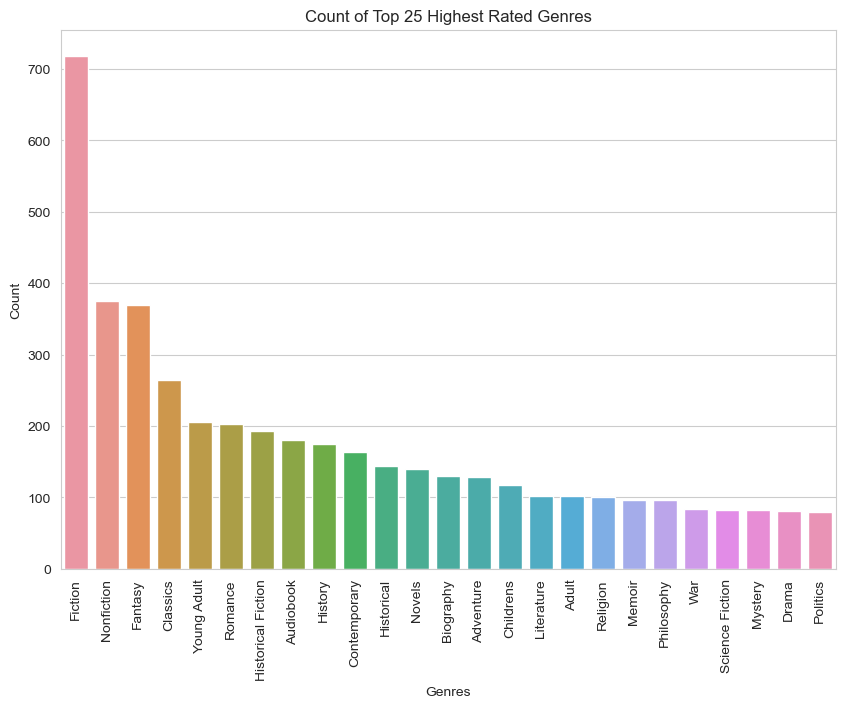

In [45]:
# plot this
fig = plt.figure(figsize =(10, 7))
sns.set_style("whitegrid")
sns.barplot(x='Genres', y='Count', data=df3_top25).set(title="Count of Top 25 Highest Rated Genres")
plt.xticks(rotation=90)
plt.show()